<a href="https://colab.research.google.com/github/semthedev/OpenCV-projects/blob/main/lab_05_object_recognition_from_the_CIFAR_10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Размер мини-выборки
batch_size = 128
# Количество классов изображений
nb_classes = 10
# Количество эпох для обучения
nb_epoch = 25
# Размер изображений
img_rows, img_cols = 32, 32
# Количество каналов в изображении: RGB
img_channels = 3
# Названия классов из набора данных CIFAR-10
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [3]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


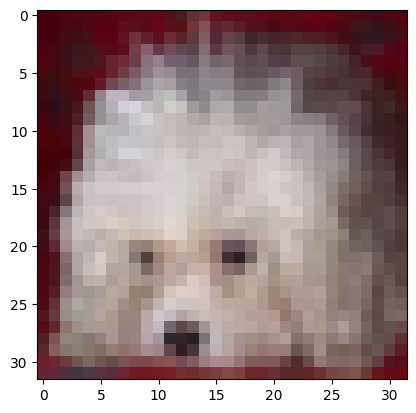

Номер класса: [5]
Тип объекта: собака


In [4]:
n = 5555
plt.imshow(X_train[n])
plt.show()
print("Номер класса:", Y_train[n])
print("Тип объекта:", classes[Y_train[n] [0]])

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [6]:
Y_train = to_categorical(Y_train, nb_classes)
Y_test = to_categorical(Y_test, nb_classes)

In [7]:
#Создаем последовательную модель
model = Sequential()
# Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same',
input_shape=(32, 32, 3), activation='relu'))

# Второй сверточный слой
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))

# Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), activation='relu'))
# Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))
# Слой преобразования данных из 2D представления в плоское
model. add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout (0.5))
# Выходной полносвязный слой
model.add(Dense(nb_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
print(model. summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,606,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,676,842 (6.40 MB)

 Trainable params: 1,676,842 (6.40 MB)

 Non-trainable params: 0 (0.00 B)

None


In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=nb_epoch,
              validation_split=0.1,
              shuffle=True,
              verbose=2)

Epoch 1/25
352/352 - 248s - 705ms/step - accuracy: 0.4086 - loss: 1.6123 - val_accuracy: 0.5512 - val_loss: 1.2373
Epoch 2/25
352/352 - 257s - 729ms/step - accuracy: 0.5719 - loss: 1.2033 - val_accuracy: 0.6260 - val_loss: 1.0410
Epoch 3/25
352/352 - 269s - 764ms/step - accuracy: 0.6333 - loss: 1.0351 - val_accuracy: 0.6824 - val_loss: 0.8912
Epoch 4/25
352/352 - 259s - 736ms/step - accuracy: 0.6710 - loss: 0.9293 - val_accuracy: 0.7162 - val_loss: 0.8098
Epoch 5/25
352/352 - 261s - 742ms/step - accuracy: 0.6965 - loss: 0.8572 - val_accuracy: 0.7310 - val_loss: 0.7710
Epoch 6/25
352/352 - 266s - 756ms/step - accuracy: 0.7212 - loss: 0.7914 - val_accuracy: 0.7498 - val_loss: 0.7337
Epoch 7/25
352/352 - 254s - 721ms/step - accuracy: 0.7420 - loss: 0.7322 - val_accuracy: 0.7582 - val_loss: 0.7217
Epoch 8/25
352/352 - 256s - 729ms/step - accuracy: 0.7589 - loss: 0.6859 - val_accuracy: 0.7666 - val_loss: 0.6859
Epoch 9/25
352/352 - 264s - 749ms/step - accuracy: 0.7762 - loss: 0.6386 - val_a

In [23]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print(f"Точность работы на тестовых данных: {scores[1] * 100:.2f}%")

Точность работы на тестовых данных: 78.78%


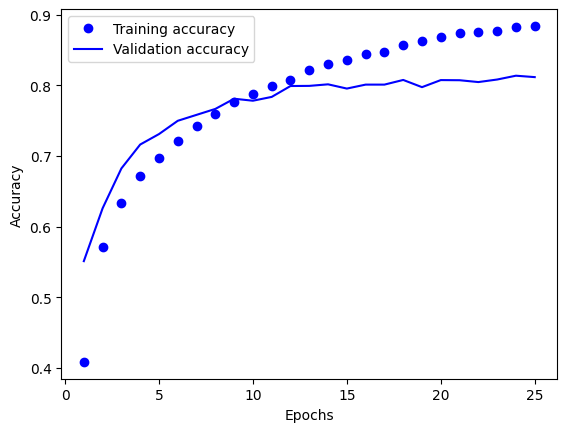

In [24]:
import matplotlib.pyplot as plt

history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [25]:
import json

# Сохранение модели в формате JSON
model_json = model.to_json()
with open("cifar10_model.json", "w") as json_file:
    json_file.write(model_json)

# Сохранение весов модели
model.save_weights("cifar10_model.weights.h5")

In [26]:
!ls

cifar10_model.json  cifar10_model.weights.h5  drive  sample_data


In [27]:
from google.colab import files

In [28]:
files.download("cifar10_model.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

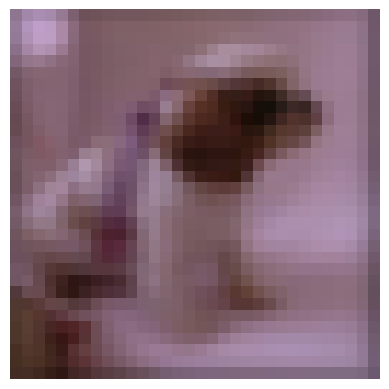

In [29]:
import matplotlib.pyplot as plt
# Индекс изображения
index = 178
# Отображение изображения
plt.imshow(X_test[index]) # Если изображение нормализовано, используйте это
plt.axis('off') # Отключение осей
plt.show()

In [30]:
x = X_test [index]
x = np.expand_dims(x, axis=0)

In [31]:
prediction = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [32]:
print(prediction)

[[1.1374186e-03 1.9220152e-04 2.3571335e-02 6.1474025e-01 2.9701512e-02
  3.0696660e-01 2.0407118e-02 3.0326492e-03 1.7329946e-04 7.7687095e-05]]


In [33]:
prediction = np.argmax(prediction)
print(classes [prediction])

кот


In [42]:
print(classes[int(Y_test[index, 0])])

самолет


In [43]:
from google.colab import files

files.upload()

Saving 1200px-Iraqi_Air_Force_Antonov_An-32B.jpg to 1200px-Iraqi_Air_Force_Antonov_An-32B.jpg


{'1200px-Iraqi_Air_Force_Antonov_An-32B.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01,\x01,\x00\x00\xff\xfe\x00XFile source: http://commons.wikimedia.org/wiki/File:Iraqi_Air_Force_Antonov_An-32B.jpg\xff\xdb\x00C\x00\x06\x04\x05\x06\x05\x04\x06\x06\x05\x06\x07\x07\x06\x08\n\x10\n\n\t\t\n\x14\x0e\x0f\x0c\x10\x17\x14\x18\x18\x17\x14\x16\x16\x1a\x1d%\x1f\x1a\x1b#\x1c\x16\x16 , #&\')*)\x19\x1f-0-(0%()(\xff\xdb\x00C\x01\x07\x07\x07\n\x08\n\x13\n\n\x13(\x1a\x16\x1a((((((((((((((((((((((((((((((((((((((((((((((((((\xff\xc0\x00\x11\x08\x03 \x04\xb0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x01\x01\x00\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x05\x06\x02\x03\x04\x07\x08\xff\xc4\x00J\x10\x00\x02\x01\x03\x02\x03\x05\x04\x07\x06\x04\x05\x02\x06\x02\x03\x00\x01\x02\x03\x04\x11\x05!\x121A\x06\x13Qaq"2\x81\x91\x07\x14BR\xa1\xb1\xc1\x15#br\xd1\xf03\x82\x92\xe1\x16$CS\xf1\x08cDTUs\xa2\xc2%&4\x83\xb2\xff\xc4\x00\x1b\x01\x01\x01\x00\x03\x01\x01\x01\x00\x00\x00\

In [44]:
!ls

1200px-Iraqi_Air_Force_Antonov_An-32B.jpg  cifar10_model.weights.h5  sample_data
cifar10_model.json			   drive


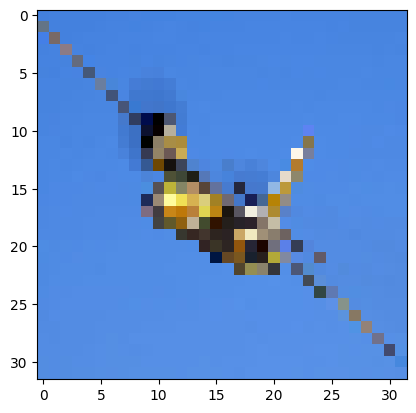

In [45]:
img_path = '/content/drive/MyDrive/8 семестр весна (4 курс 2025 года)/Система компьютерного зрения /lab-05/1200px-Iraqi_Air_Force_Antonov_An-32B.jpg' #НАЗВАНИЕ ФАЙЛА КОТОРЫЙ ВЫ ЗАГРУЗИЛИ ВЫШЕ
img = image.load_img(img_path, target_size=(32, 32))
plt.imshow(img)
plt.show()

In [46]:
x = image.img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

In [47]:
prediction = model.predict(x)
prediction = np.argmax(prediction)
print(classes [prediction])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
самолет
